### Visual and check icesat2 data on the study region.
##### 1. Visual the icesat2 data on the study region.
##### 2. Compare icesat2 atl3 and atl6 data (weak/strong beams). 

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


In [3]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_wkunlun_vec = 'data/boundary/wkunlun.gpkg'
path_karakoram_vec = 'data/boundary/karakoram.gpkg'
path_wkunlun_rgi60 = 'data/rgi60/rgi60_13_wkunlun.gpkg'
path_karakoram_rgi60 = 'data/rgi60/rgi60_14_karakoram.gpkg'



In [10]:
### Read full-region/one-year ATL06 data
with h5py.File('data/icesat/atl06-readout/ATL06_2020.h5','r') as f_atl06:
    atl06_lat_2020   = f_atl06['h_lat'][:]
    atl06_lon_2020   = f_atl06['h_lon'][:]
    atl06_h_2020 = f_atl06['h_li'][:]
    atl06_time_2020 = f_atl06['t_dyr'][:]
    atl06_beam_2020 = f_atl06['beam_type'][:]
    atl06_spot_2020 = f_atl06['spot'][:]    # 1->strong; 0->weak
    atl06_rgt_2020 = f_atl06['rgt'][:]    # 1->strong; 0->weak
    print(f_atl06.keys())


<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


In [5]:
### Read one-tile/one-year ATL06 data
with h5py.File('data/icesat/atl06-readout/tile-36-78/ATL06_2020.h5','r') as f_atl06_tile:
    atl06_lat_tile_2020   = f_atl06_tile['h_lat'][:]
    atl06_lon_tile_2020   = f_atl06_tile['h_lon'][:]
    atl06_h_tile_2020 = f_atl06_tile['h_li'][:]
    atl06_time_tile_2020 = f_atl06_tile['t_dyr'][:]
    atl06_beam_tile_2020 = f_atl06_tile['beam_type'][:]
    atl06_spot_tile_2020 = f_atl06_tile['spot'][:]    # 1->strong; 0->weak
    atl06_rgt_tile_2020 = f_atl06_tile['rgt'][:]    # 1->strong; 0->weak
    print(f_atl06_tile.keys())


<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


In [79]:
### Read one-tile/one-month atl03 data
plt.figure(figsize=[8, 8])
with h5py.File('data/icesat/atl03-readout/tile-36-78/ATL03_202001.h5','r') as f_atl03_tile:
    atl03_lat_tile_202001   = f_atl03_tile['h_lat'][:]
    atl03_lon_tile_202001   = f_atl03_tile['h_lon'][:]
    atl03_h_tile_202001 = f_atl03_tile['h_li'][:]
    atl03_time_tile_202001 = f_atl03_tile['t_dyr'][:]
    atl03_beam_tile_202001 = f_atl03_tile['beam_type'][:]    # 1->strong; 0->weak
    atl03_spot_tile_202001 = f_atl03_tile['spot'][:]    # 1->strong; 0->weak
    atl03_rgt_tile_202001 = f_atl03_tile['rgt'][:]    # 1->strong; 0->weak
    print(f_atl03_tile.keys())


<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


<Figure size 576x576 with 0 Axes>

### 1. Global view for atl06 data (full-region/one-tile)

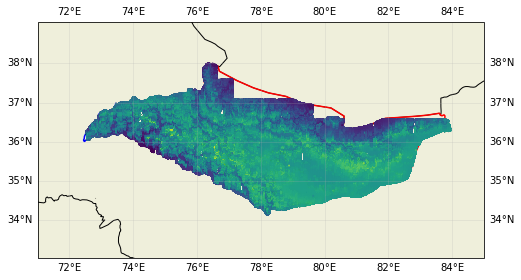

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))

ax.set_extent([71, 85, 33.0, 39.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
## 1. tibet boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_hma_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='Black', linewidth=1, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 3. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. icesat-2 atl06 data
ax.scatter(x=atl06_lon_2020, y=atl06_lat_2020, c=atl06_h_2020, \
                                 s=1, transform=ccrs.PlateCarree(), zorder=0)


### 2. Local view (one-tile/one-year)

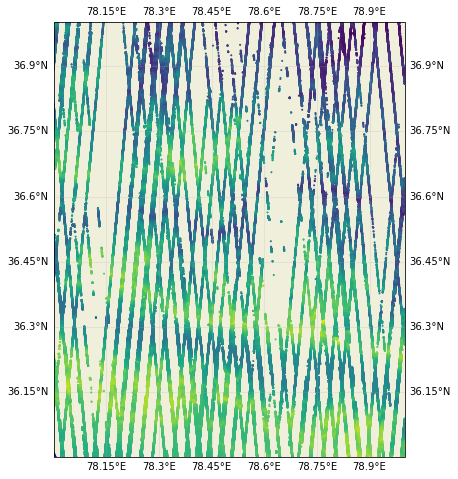

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([78, 79, 36.0, 37.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 3. icesat-2 atl06 data
ax.scatter(x=atl06_lon_tile_2020, y=atl06_lat_tile_2020, c=atl06_h_tile_2020, \
                                      s=1, transform=ccrs.PlateCarree(), zorder=0)
